In [ ]:
import numpy as np

In [ ]:
# Blurred Image

!wget https://res.cloudinary.com/demo/image/upload/e_blur:400/front_face.jpg

--2021-08-11 09:19:22--  https://res.cloudinary.com/demo/image/upload/e_blur:400/front_face.jpg
Resolving res.cloudinary.com (res.cloudinary.com)... 151.101.1.137, 151.101.65.137, 151.101.129.137, ...
Connecting to res.cloudinary.com (res.cloudinary.com)|151.101.1.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11960 (12K) [image/jpeg]
Saving to: ‘front_face.jpg’

front_face.jpg      100%[===================>]  11.68K  --.-KB/s    in 0s      

2021-08-11 09:19:22 (47.2 MB/s) - ‘front_face.jpg’ saved [11960/11960]



In [ ]:
# Sharped Image

!wget https://static.photocdn.pt/images/articles/2017/04/11/iStock-185258020-1.jpg

--2021-08-11 09:20:13--  https://static.photocdn.pt/images/articles/2017/04/11/iStock-185258020-1.jpg
Resolving static.photocdn.pt (static.photocdn.pt)... 172.67.71.58, 104.26.0.77, 104.26.1.77, ...
Connecting to static.photocdn.pt (static.photocdn.pt)|172.67.71.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84538 (83K) [image/jpeg]
Saving to: ‘iStock-185258020-1.jpg’

iStock-185258020-1. 100%[===================>]  82.56K  --.-KB/s    in 0.01s   

2021-08-11 09:20:13 (6.04 MB/s) - ‘iStock-185258020-1.jpg’ saved [84538/84538]



In [ ]:
# Using average filter

def averageFilter(img, kernel_size):

    mid_x = int(kernel_size//2)
    mid_y = int(kernel_size//2)

    dx = np.zeros((kernel_size, kernel_size))
    dy = np.zeros((kernel_size, kernel_size))

    kernel = np.ones((kernel_size, kernel_size))/(kernel_size*kernel_size)

    for i in range(kernel_size):
        for j in range(kernel_size):
            dx[i][j] = int(i-mid_x)
            dy[i][j] = int(j-mid_y)

    final_image = np.zeros((img.shape[0], img.shape[1], 1))

    for i in range(int(mid_x), img.shape[0]-(kernel_size//2)):
        for j in range(int(mid_y), img.shape[1]-(kernel_size//2)):
            sum_making_mean = 0.00
            for k_i in range(kernel_size):
                for k_j in range(kernel_size):
                    sum_making_mean += img[i+int(dx[k_i][k_j])][j+int(dy[k_i][k_j])][0]*kernel[k_i][k_j]
            final_image[i][j][0] = sum_making_mean

    return final_image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# The Blurred Image

img_b = cv2.imread("/content/front_face.jpg")

In [ ]:
output_for_blurred = averageFilter(img_b, kernel_size=5)

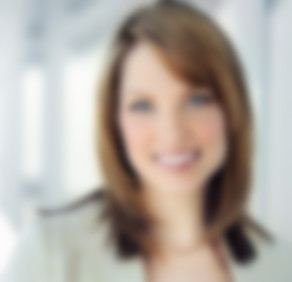

In [ ]:
cv2_imshow(img_b)

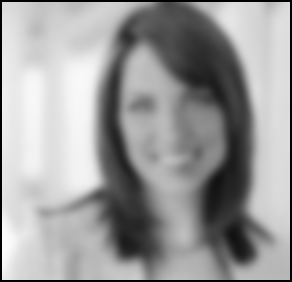

In [ ]:
cv2_imshow(output_for_blurred)

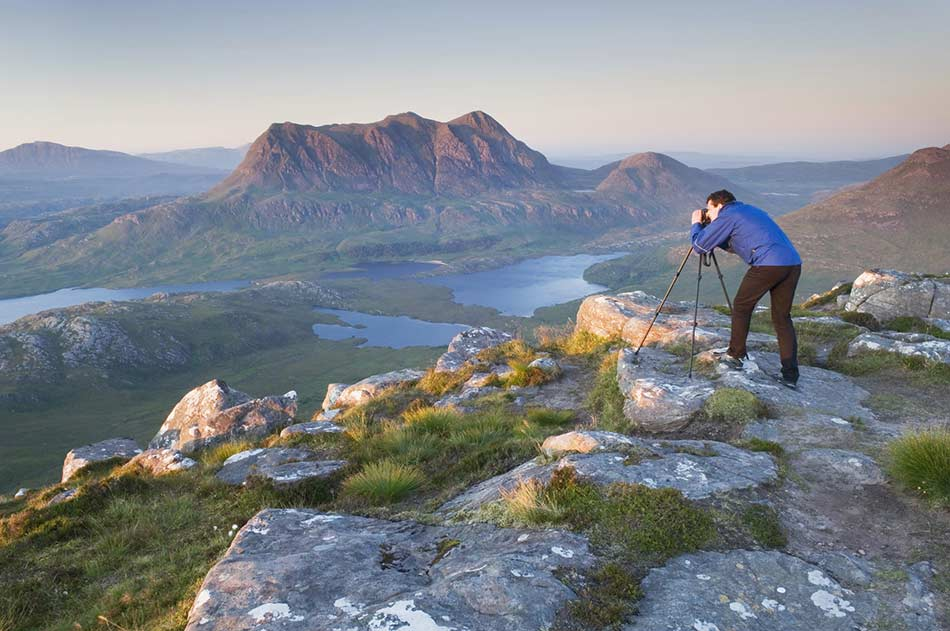

In [ ]:
cv2_imshow(img_sh)

In [ ]:
# The Sharp Image
img_sh = cv2.imread("/content/iStock-185258020-1.jpg")
output_for_sharp = averageFilter(img_sh, kernel_size=5)

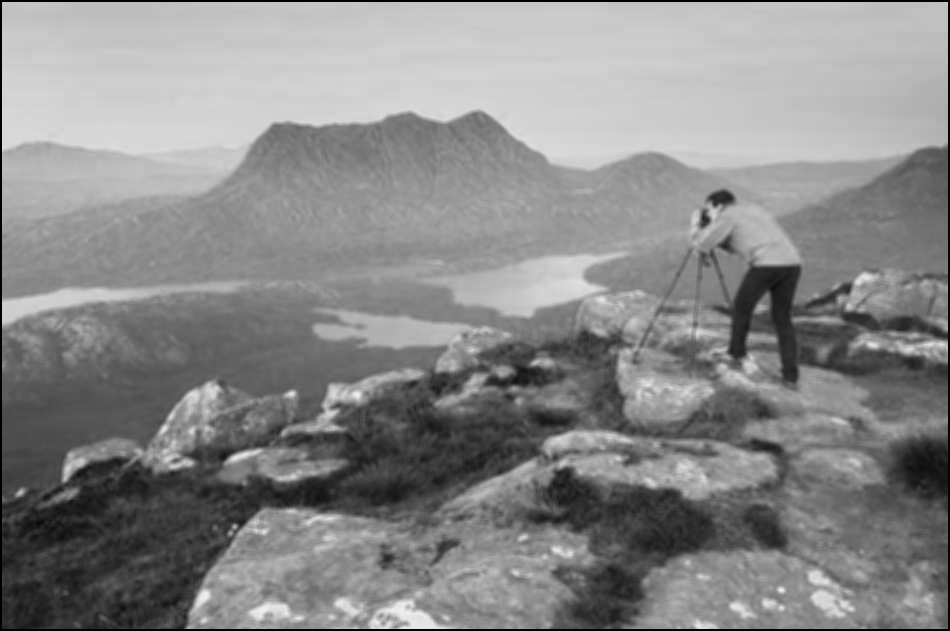

In [ ]:
cv2_imshow(output_for_sharp)

Problem 2

In [ ]:
# Finding a low contrast image

!wget https://www.researchgate.net/profile/Christian-Bauckhage/publication/281118372/figure/fig1/AS:614203941478420@1523449039774/Example-of-low-contrast-images-and-corresponding-results-of-intensity-normalization-and.png

--2021-08-11 09:31:28--  https://www.researchgate.net/profile/Christian-Bauckhage/publication/281118372/figure/fig1/AS:614203941478420@1523449039774/Example-of-low-contrast-images-and-corresponding-results-of-intensity-normalization-and.png
Resolving www.researchgate.net (www.researchgate.net)... 104.17.32.105, 104.17.33.105, 2606:4700::6811:2169, ...
Connecting to www.researchgate.net (www.researchgate.net)|104.17.32.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27943 (27K) [image/png]
Saving to: ‘Example-of-low-contrast-images-and-corresponding-results-of-intensity-normalization-and.png’

Example-of-low-cont 100%[===================>]  27.29K  --.-KB/s    in 0.04s   

2021-08-11 09:31:29 (607 KB/s) - ‘Example-of-low-contrast-images-and-corresponding-results-of-intensity-normalization-and.png’ saved [27943/27943]



In [ ]:
img_lc = cv2.imread("/content/Example-of-low-contrast-images-and-corresponding-results-of-intensity-normalization-and.png")

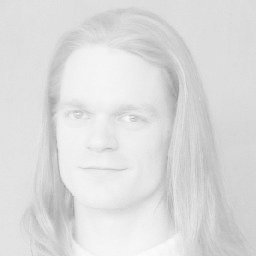

In [ ]:
cv2_imshow(img_lc)

In [ ]:
c = 255.0 / (np.log(1+np.max(img_lc)))

In [ ]:
output_image_log = img_lc

for i in range(img_lc.shape[0]):
    for j in range(img_lc.shape[1]):
        output_image_log[i][j] = c*np.log(1+img_lc[i][j])

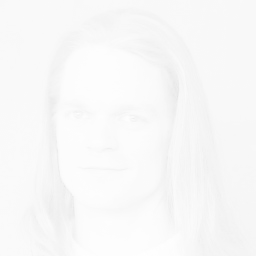

In [ ]:
cv2_imshow(output_image_log)

In [ ]:
# Power Law Function

output_image_power = img_lc

gamma = 2.4

for i in range(img_lc.shape[0]):
    for j in range(img_lc.shape[1]):
        output_image_power[i][j] = c*(pow(img_lc[i][j], gamma))

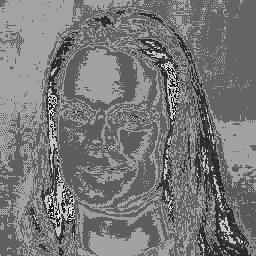

In [ ]:
cv2_imshow(output_image_power)